In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from tabulate import tabulate
import matplotlib.pyplot as plt
import re

%matplotlib inline

In [2]:
import os

os.chdir('C:\\Users\\dalto\\OpM na Prática\\Python\\Base de Dados')

In [3]:
url = "https://www.iqb3.com.br/btcranking"

html = requests.get(url)

print(html)
print(html.content)

<Response [200]>
b'<!DOCTYPE html>\n<html lang="pt-br" >\n\n<head>\n  <script src="https://code.jquery.com/jquery-1.10.2.js"></script>\n  <script src="https://www.iqb3.com.br/js/iqb3.js"></script>\n  <script data-ad-client="ca-pub-8249668946479832" async src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script>\n  <script src="https://cdnjs.cloudflare.com/ajax/libs/Chart.js/2.7.1/Chart.bundle.min.js"></script>\n  <script src="https://cdnjs.cloudflare.com/ajax/libs/Chart.js/2.7.1/Chart.min.js"></script>\n  <meta charset="UTF-8">\n  <meta name="keywords" content="aluguel,investimento,carteira de op\xc3\xa7\xc3\xb5es,carteira,op\xc3\xa7\xc3\xb5es,bolsa de valores,b3,ibov,ibovespa,bmf,\xc3\xadndice de qualidade,derivativos,a\xc3\xa7\xc3\xb5es,a\xc3\xa7\xc3\xa3o,aluguel de a\xc3\xa7\xc3\xb5es">\n  <title>IQB3 - Aluguel de A\xc3\xa7\xc3\xb5es</title>\n    <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/meyer-reset/2.0/reset.min.css">\n    <link rel="s

In [4]:
html = BeautifulSoup(html.content, "html.parser")

html

<!DOCTYPE html>

<html lang="pt-br">
<head>
<script src="https://code.jquery.com/jquery-1.10.2.js"></script>
<script src="https://www.iqb3.com.br/js/iqb3.js"></script>
<script async="" data-ad-client="ca-pub-8249668946479832" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script>
<script src="https://cdnjs.cloudflare.com/ajax/libs/Chart.js/2.7.1/Chart.bundle.min.js"></script>
<script src="https://cdnjs.cloudflare.com/ajax/libs/Chart.js/2.7.1/Chart.min.js"></script>
<meta charset="utf-8"/>
<meta content="aluguel,investimento,carteira de opções,carteira,opções,bolsa de valores,b3,ibov,ibovespa,bmf,índice de qualidade,derivativos,ações,ação,aluguel de ações" name="keywords"/>
<title>IQB3 - Aluguel de Ações</title>
<link href="https://cdnjs.cloudflare.com/ajax/libs/meyer-reset/2.0/reset.min.css" rel="stylesheet"/>
<link href="https://www.iqb3.com.br/css/iqb3.css" rel="stylesheet"/>
</head>
<body>
<div class="header">
<div class="container">
<div class="logo">
<a hre

In [5]:
tabelas = html.find_all("table")

tabelas

[<table border="0" cellpadding="0" cellspacing="0" id="papeis">
 <tr><td>RANKING - BTC</td></tr>
 </table>,
 <table border="0" cellpadding="0" cellspacing="0">
 <thead>
 <tr style="background-color:#000000">
 <th title="CÓDIGO DA EMPRESA">Papel</th>
 <th title="NOME DA EMPRESA">Empresa</th>
 <th title="PERCENTUAL">Percentual</th>
 </tr>
 </thead>
 </table>,
 <table border="0" cellpadding="0" cellspacing="0" id="myTable">
 <tbody>
 <tr>
 <td><a href="/btc/a1ua34">A1UA34 - BDR</a></td>
 <td>Amglogold Ashanti Ltd</td>
 <td>49100%</td>
 </tr>
 <tr>
 <td><a href="/btc/t1wl34">T1WL34 - BDR</a></td>
 <td>TWILIO</td>
 <td>15563.64%</td>
 </tr>
 <tr>
 <td><a href="/btc/g1ds34">G1DS34 - </a></td>
 <td>GDS HOLDINGS LTD</td>
 <td>1333.33%</td>
 </tr>
 <tr>
 <td><a href="/btc/khcb34">KHCB34 - DRN</a></td>
 <td>THE KRAFT HEINZ COMP</td>
 <td>1062.32%</td>
 </tr>
 <tr>
 <td><a href="/btc/g1sk34">G1SK34 - BDR</a></td>
 <td>Glaxosmithkline Plc</td>
 <td>1016.67%</td>
 </tr>
 <tr>
 <td><a href="/btc/ibm

In [6]:
tab0 = tabelas[0]

dfTab0 = pd.read_html(str(tab0))[0]
dfTab0

,0
0,RANKING - BTC


In [7]:
tab1 = tabelas[1]

dfTab1 = pd.read_html(str(tab1))[0]
dfTab1

,Papel,Empresa,Percentual


In [8]:
tab2 = tabelas[2]

dfTab2 = pd.read_html(str(tab2))[0]
dfTab2

,0,1,2
0,A1UA34 - BDR,Amglogold Ashanti Ltd,49100%
1,T1WL34 - BDR,TWILIO,15563.64%
2,G1DS34 -,GDS HOLDINGS LTD,1333.33%
3,KHCB34 - DRN,THE KRAFT HEINZ COMP,1062.32%
4,G1SK34 - BDR,Glaxosmithkline Plc,1016.67%
5,IBMB34 - DRN,INTERNATIONAL BUSINE,965.22%
6,SULA3 - ON,SUL AMERICA S.A,704.23%
7,D1OC34 - DRN,Docusign Inc,471.02%
8,W1BO34 - BDR,Weibo Corp,400%
9,TCNO3 - ON,TECNOSOLO ENG E TEC,353.82%


In [9]:
dfTab2.columns  = dfTab1.columns
dfTab2

,Papel,Empresa,Percentual
0,A1UA34 - BDR,Amglogold Ashanti Ltd,49100%
1,T1WL34 - BDR,TWILIO,15563.64%
2,G1DS34 -,GDS HOLDINGS LTD,1333.33%
3,KHCB34 - DRN,THE KRAFT HEINZ COMP,1062.32%
4,G1SK34 - BDR,Glaxosmithkline Plc,1016.67%
5,IBMB34 - DRN,INTERNATIONAL BUSINE,965.22%
6,SULA3 - ON,SUL AMERICA S.A,704.23%
7,D1OC34 - DRN,Docusign Inc,471.02%
8,W1BO34 - BDR,Weibo Corp,400%
9,TCNO3 - ON,TECNOSOLO ENG E TEC,353.82%


In [10]:
print(tabulate(dfTab2, headers = "keys", tablefmt = "psql"))

+----+--------------+-----------------------+--------------+
|    | Papel        | Empresa               | Percentual   |
|----+--------------+-----------------------+--------------|
|  0 | A1UA34 - BDR | Amglogold Ashanti Ltd | 49100%       |
|  1 | T1WL34 - BDR | TWILIO                | 15563.64%    |
|  2 | G1DS34 -     | GDS HOLDINGS LTD      | 1333.33%     |
|  3 | KHCB34 - DRN | THE KRAFT HEINZ COMP  | 1062.32%     |
|  4 | G1SK34 - BDR | Glaxosmithkline Plc   | 1016.67%     |
|  5 | IBMB34 - DRN | INTERNATIONAL BUSINE  | 965.22%      |
|  6 | SULA3 - ON   | SUL AMERICA S.A       | 704.23%      |
|  7 | D1OC34 - DRN | Docusign Inc          | 471.02%      |
|  8 | W1BO34 - BDR | Weibo Corp            | 400%         |
|  9 | TCNO3 - ON   | TECNOSOLO ENG E TEC   | 353.82%      |
+----+--------------+-----------------------+--------------+


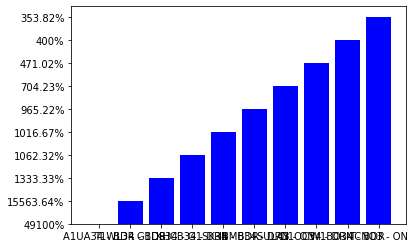

In [11]:
plt.bar(dfTab2["Papel"], dfTab2["Percentual"], color = "b")
plt.show()

In [12]:
print(dfTab2.dtypes)
#dfTab2.info()

Papel         object
Empresa       object
Percentual    object
dtype: object


In [13]:
# removendo o % e convertendo para números

dfTab2["Percentual"] = dfTab2["Percentual"].str.replace("%","")
dfTab2["Percentual"] = pd.to_numeric(dfTab2["Percentual"])

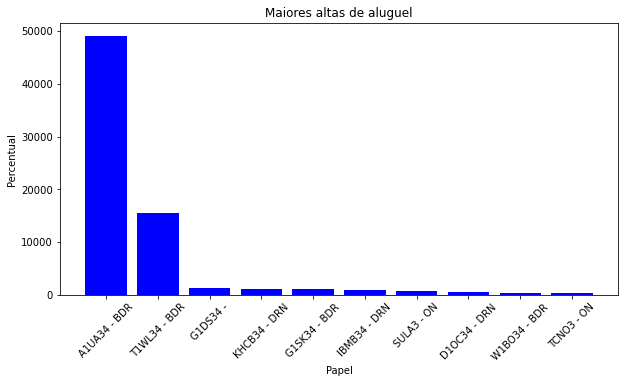

In [14]:
plt.figure(figsize=(10,5))
plt.bar(dfTab2["Papel"], dfTab2["Percentual"], color = "b")
plt.title("Maiores altas de aluguel")
plt.xlabel("Papel")
plt.xticks(rotation = 45)
plt.ylabel("Percentual")
plt.show()

In [15]:
tab4 = tabelas[4]
dfTab4 = pd.read_html(str(tab4))[0]

dfTab4.columns  = dfTab1.columns

dfTab4["Percentual"] = dfTab4["Percentual"].str.replace("%","")
dfTab4["Percentual"] = pd.to_numeric(dfTab4["Percentual"])
print(dfTab4.dtypes)

Papel          object
Empresa        object
Percentual    float64
dtype: object


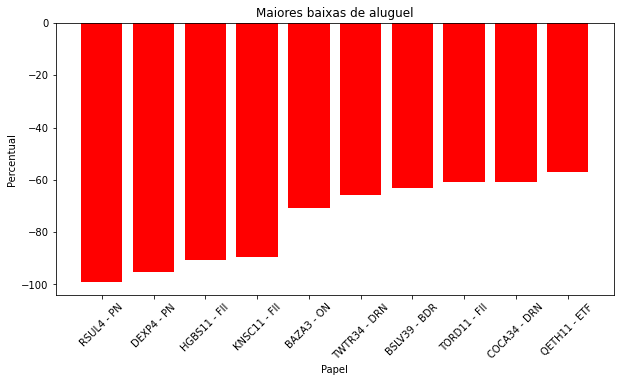

In [16]:
plt.figure(figsize=(10,5))
plt.bar(dfTab4["Papel"], dfTab4["Percentual"], color = "r")
plt.title("Maiores baixas de aluguel")
plt.xlabel("Papel")
plt.xticks(rotation = 45)
plt.ylabel("Percentual")
plt.show()

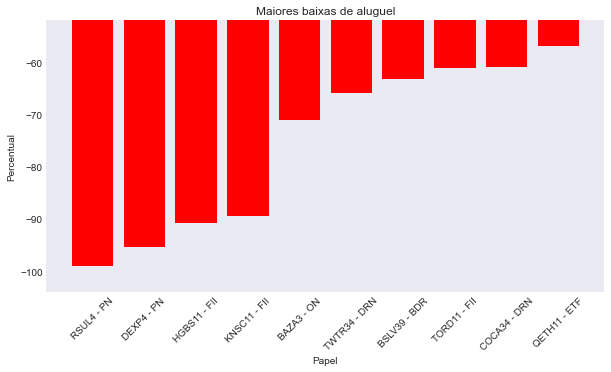

In [17]:
with plt.style.context("seaborn-dark"):
    plt.figure(figsize=(10,5))
    plt.bar(dfTab4["Papel"], dfTab4["Percentual"], color = "r")
    plt.title("Maiores baixas de aluguel")
    plt.xlabel("Papel")
    plt.xticks(rotation = 45)
    plt.ylabel("Percentual")
    plt.ylim([dfTab4["Percentual"].min()-5, dfTab4["Percentual"].max()+5])
    #plt.savefig("maioresBaixas.png", bbox_inches = "tight")
    plt.show()